<a href="https://colab.research.google.com/github/byambaa1982/CodingWorkshops/blob/master/event_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

## Read data here. Upload data in same directory. 


In [0]:
data = pd.read_csv('/billieconcert.csv')

## See how many columns and rows here

In [0]:
data.shape

(910, 9)

## Just see the first five rows

In [0]:
data.head()

,Event,Venue,Event date,Zone,Section,Price,Row,Qty,Date sold
0,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,B Center,617.81,S,4,2019/02/05 10:09:33
1,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve C Sides,345.77,V,2,2019/02/05 09:30:39
2,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve A Center,459.87,Q,3,2019/02/07 21:45:23
3,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Reserve B Center,218.29,K,2,2019/02/07 21:29:08
4,Billie Eilish,Greek Theatre Los Angeles,2019/07/11 19:00:00,NaN,Benches,114.75,C,2,2019/02/07 20:31:02


## We need only "Section", "Price" and  "Date sold" features. 
## Let's make a new dataframe on those

In [0]:
df =data[4:]

In [0]:
df=data[['Section', 'Price','Date sold']]
df=df.sort_values(by='Price', ascending=False)

In [0]:
df.head()

,Section,Price,Date sold
869,Reserve A Center,2182.38,2019/07/09 20:47:25
663,Reserve A Center,1498.00,2019/05/04 21:55:00
686,Reserve A Center,1495.00,2019/05/13 21:15:27
675,Reserve A Center,1495.00,2019/05/11 12:49:36
871,Reserve A Sides,1439.00,2019/07/09 19:28:30


## Split "Date sold" into "date" and "time"

In [0]:
df['splitted']=df[df.columns[2]].map(lambda x:x.split(' '))
df['date']=df['splitted'].map(lambda x:x[0])
df['time']=df['splitted'].map(lambda x:x[1])

## Let's see our new dataframe

In [0]:
df.head()

,Section,Price,Date sold,splitted,date,time
869,Reserve A Center,2182.38,2019/07/09 20:47:25,"[2019/07/09, 20:47:25]",2019/07/09,20:47:25
663,Reserve A Center,1498.00,2019/05/04 21:55:00,"[2019/05/04, 21:55:00]",2019/05/04,21:55:00
686,Reserve A Center,1495.00,2019/05/13 21:15:27,"[2019/05/13, 21:15:27]",2019/05/13,21:15:27
675,Reserve A Center,1495.00,2019/05/11 12:49:36,"[2019/05/11, 12:49:36]",2019/05/11,12:49:36
871,Reserve A Sides,1439.00,2019/07/09 19:28:30,"[2019/07/09, 19:28:30]",2019/07/09,19:28:30


## What sections in the venue did the highest value of sales?
## Let's groupby "Section" and sort it by total price values

In [0]:
df_sec=df.groupby(['Section']).sum().sort_values(by='Price', ascending=False)
df_mean=df.groupby(['Section']).mean().sort_values(by='Price', ascending=False)

In [0]:
result = pd.merge(df_sec, df_mean, on='Section')
result.rename(columns={'Price_x': 'total_price', 'Price_y': 'average_price'}, inplace=True)
result=result.head()

## This our main function visualizing our data

In [0]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots(figsize=(15, 8))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_xlabel(x_label,fontsize=16)
    ax.set_title(title, fontsize=20, pad=30)
    plt.xticks(x_data, labels=x_data, rotation='vertical')

#Bar plots are most effective when you are trying to visualize categorical data that has few (probably < 10) categories. If we have too many categories then the bars will be very cluttered in the figure and hard to understand.

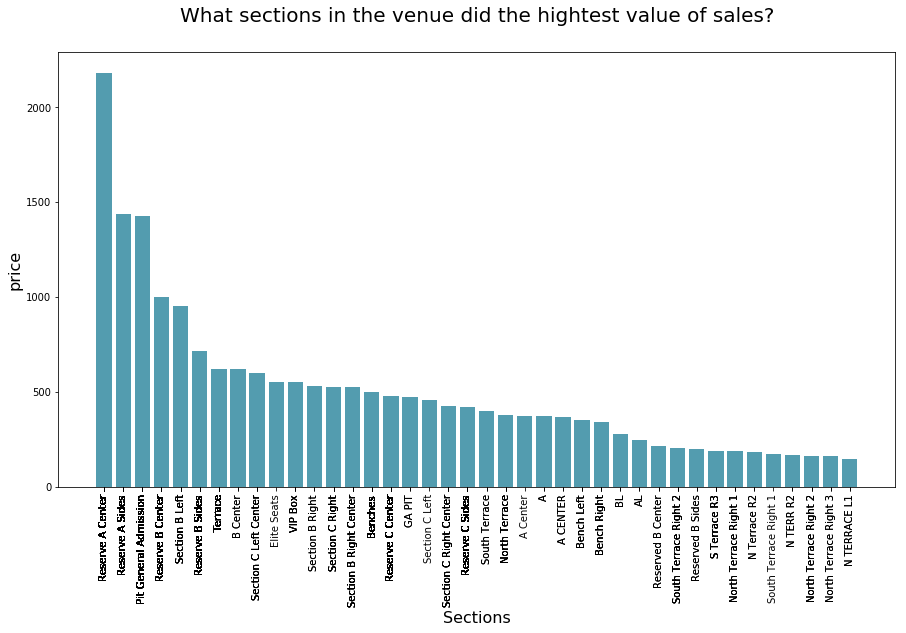

In [0]:
barplot(df.Section, df.Price, x_label="Sections", y_label="price", title="What sections in the venue did the hightest value of sales?" )

## Top ten sections

In [0]:
viz=df_sec.sort_values(by='Price', ascending=False)
viz=viz.head(10)

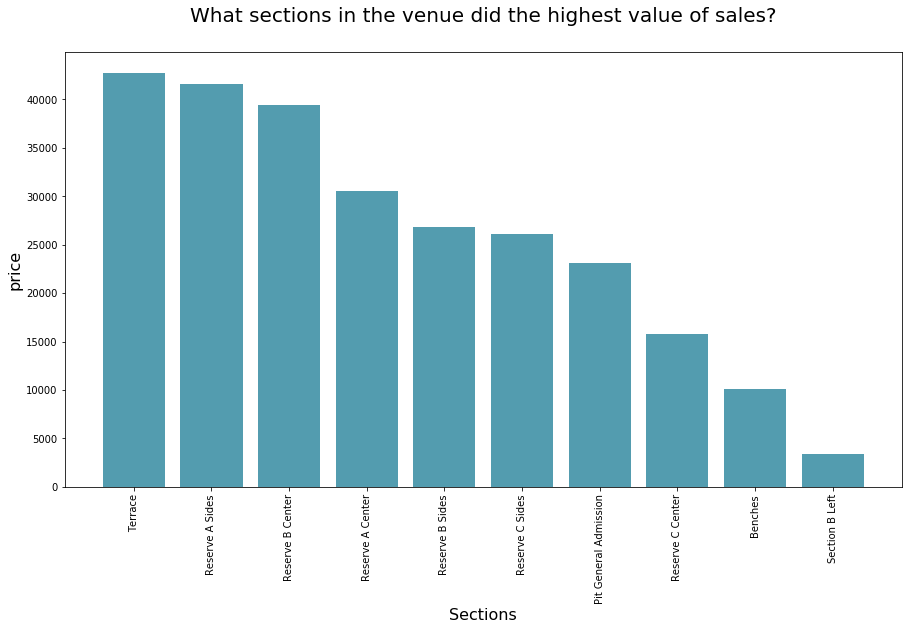

In [0]:
barplot(viz.index, viz.Price, x_label="Sections", y_label="price", title="What sections in the venue did the highest value of sales?" )

##  When was the best time to sell the tickets?

## Let's groupby "Date" and sort it by price values

In [81]:
df_date=df.groupby(['date']).sum()
df_date.sort_values(by='Price', ascending=False)
df_date.head(10)

,Price
date,
2019/02/05,1741.58
2019/02/07,15531.76
2019/02/08,37978.45
2019/02/09,7495.97
2019/02/10,1583.55
2019/02/11,961.62
2019/02/12,2670.50
2019/02/13,1303.44
2019/02/14,2393.70


## Top 10 dates

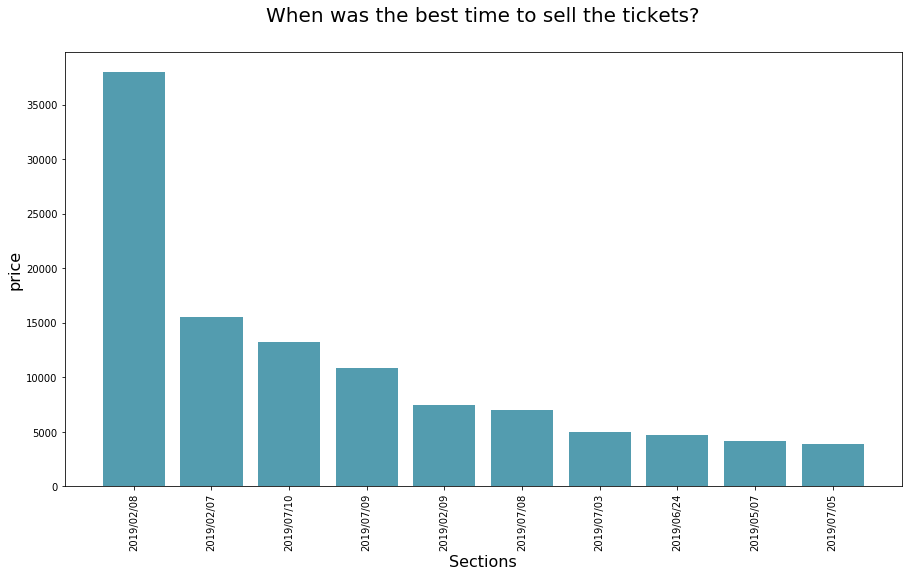

In [0]:
viz_date=df_date.sort_values(by='Price', ascending=False)
viz_date=viz_date.head(10)
barplot(viz_date.index, viz_date.Price, x_label="Sections", y_label="price", title="When was the best time to sell the tickets?" )

## Top 15 dates

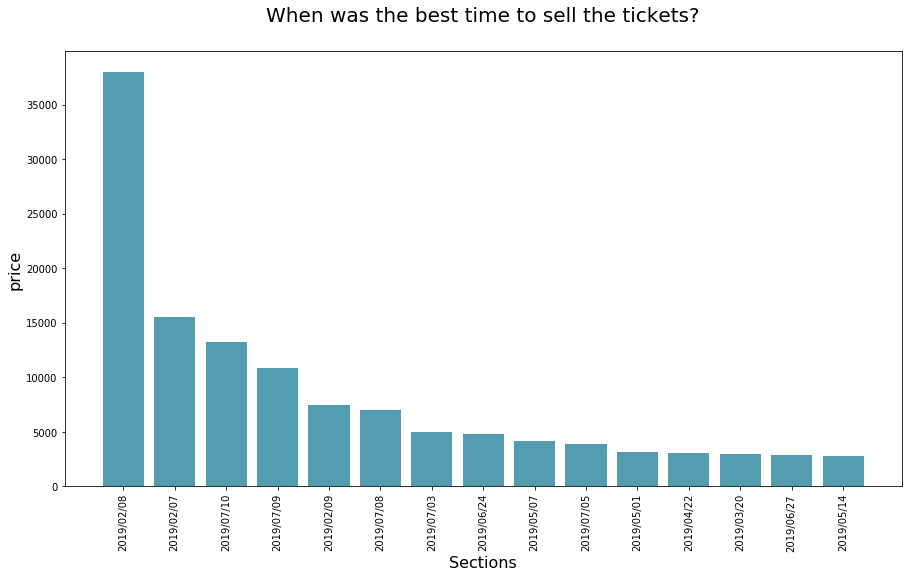

In [0]:
viz_date=df_date.sort_values(by='Price', ascending=False)
viz_date=viz_date.head(15)
barplot(viz_date.index, viz_date.Price, x_label="Sections", y_label="price", title="When was the best time to sell the tickets?" )

## What sections in the venue did the best in terms of sales?


## Average sale price per section

In [0]:
df_mean=df.groupby(['Section']).mean()
df_mean=df_mean.sort_values(by='Price', ascending=False)

In [0]:
df_mean.head()

,Price
Section,
Reserve A Center,694.600455
Pit General Admission,578.594000
B Center,558.405000
Section B Left,556.230000
Elite Seats,550.000000


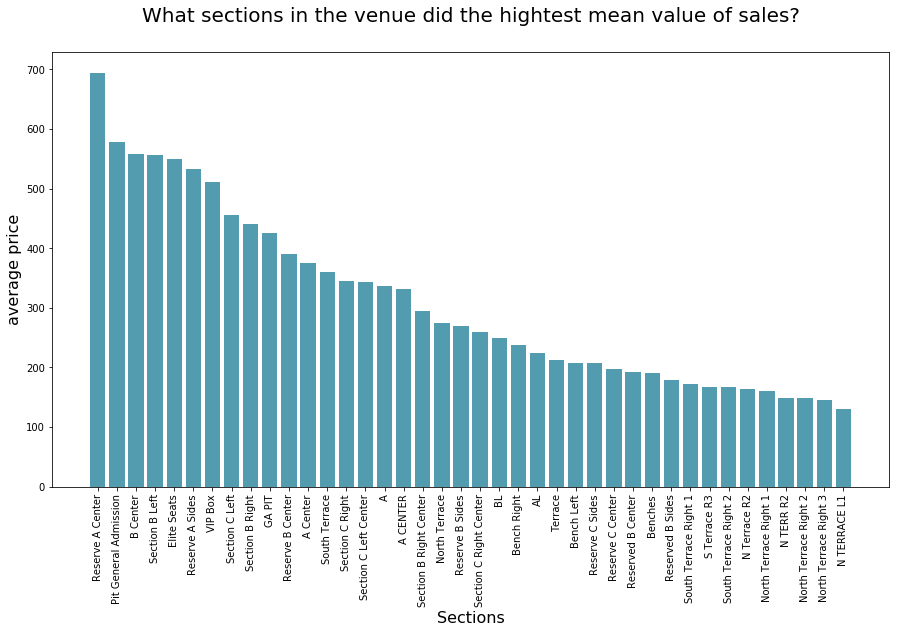

In [0]:
barplot(df_mean.index, df_mean.Price, x_label="Sections", y_label="average price", title="What sections in the venue did the hightest mean value of sales?" )

## Let's see what section sold the hightest number of tickets

In [104]:
df=data[['Section', 'Qty','Date sold']]
df=df.sort_values(by='Qty', ascending=False)
df['splitted']=df[df.columns[2]].map(lambda x:x.split(' '))
df['date']=df['splitted'].map(lambda x:x[0])
df['time']=df['splitted'].map(lambda x:x[1])
df.head()

,Section,Qty,Date sold,splitted,date,time
649,Reserve A Center,6,2019/04/30 12:43:23,"[2019/04/30, 12:43:23]",2019/04/30,12:43:23
671,Reserve A Sides,6,2019/05/07 16:04:35,"[2019/05/07, 16:04:35]",2019/05/07,16:04:35
234,VIP Box,6,2019/02/12 18:48:53,"[2019/02/12, 18:48:53]",2019/02/12,18:48:53
196,Terrace,5,2019/02/17 18:34:14,"[2019/02/17, 18:34:14]",2019/02/17,18:34:14
0,B Center,4,2019/02/05 10:09:33,"[2019/02/05, 10:09:33]",2019/02/05,10:09:33


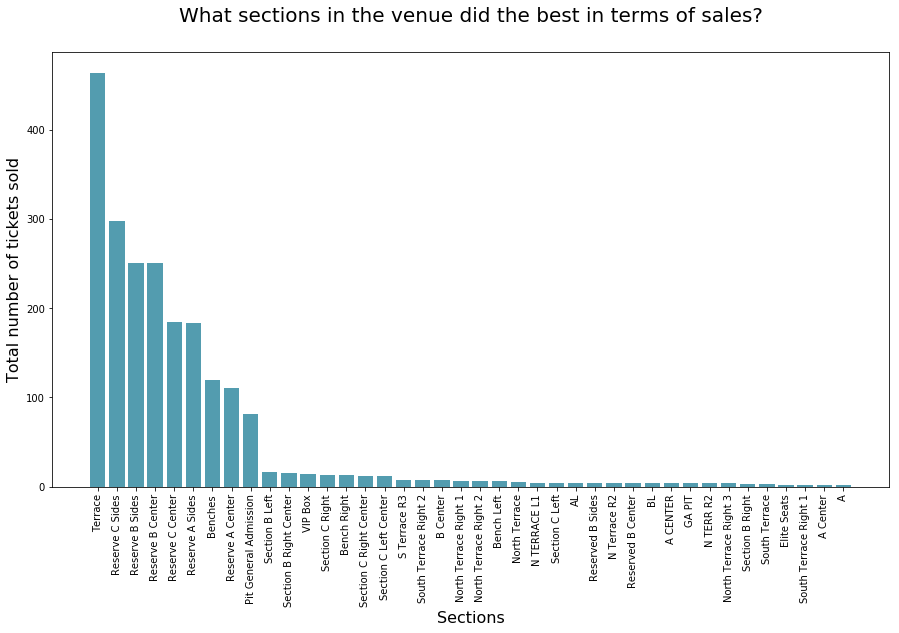

In [105]:
df_sec=df.groupby(['Section']).sum().sort_values(by='Qty', ascending=False)
barplot(df_sec.index, df_sec.Qty, x_label="Sections", y_label="Total number of tickets sold", title="What sections in the venue did the best in terms of sales?" )

In [0]:
df['Date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week']=df['Date'].dt.weekday_name

In [32]:
df.head()


,Section,Qty,Date sold,splitted,date,time,Date,day_of_week
649,Reserve A Center,6,2019/04/30 12:43:23,"[2019/04/30, 12:43:23]",2019/04/30,12:43:23,2019-04-30,Tuesday
671,Reserve A Sides,6,2019/05/07 16:04:35,"[2019/05/07, 16:04:35]",2019/05/07,16:04:35,2019-05-07,Tuesday
234,VIP Box,6,2019/02/12 18:48:53,"[2019/02/12, 18:48:53]",2019/02/12,18:48:53,2019-02-12,Tuesday
196,Terrace,5,2019/02/17 18:34:14,"[2019/02/17, 18:34:14]",2019/02/17,18:34:14,2019-02-17,Sunday
0,B Center,4,2019/02/05 10:09:33,"[2019/02/05, 10:09:33]",2019/02/05,10:09:33,2019-02-05,Tuesday


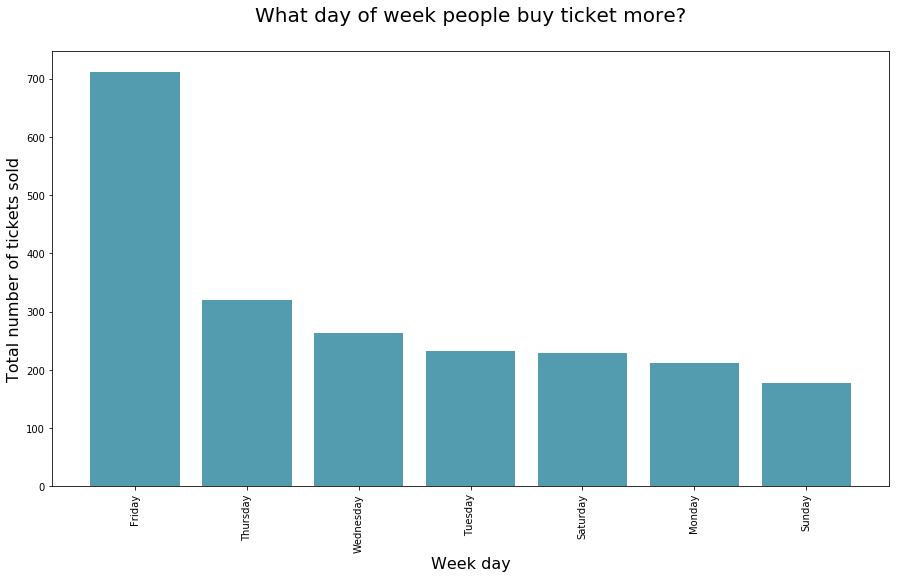

In [109]:
df_week=df.groupby(['day_of_week']).sum().sort_values(by='Qty', ascending=False)
barplot(df_week.index, df_week.Qty, x_label="Week day", y_label="Total number of tickets sold", title="What day of week people buy ticket more?" )